---
# Analisis Covid-19 por Región

En este notebook graficaremos la evolución del Covid-19 en las distintas regiones. Los datos son extraidos desde:

[https://github.com/MinCiencia/Datos-COVID19/blob/master/output/producto3/CasosTotalesCumulativo_std.csv]

---

### Importar las librerías

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Bajar los datos

In [50]:
df = pd.read_csv('datos-covid-por-region.csv')
df.head()
df.shape[0]

TypeError: 'int' object is not subscriptable

In [55]:
df['Region'].unique()

array(['Arica y Parinacota', 'Tarapacá', 'Antofagasta', 'Atacama',
       'Coquimbo', 'Valparaíso', 'Metropolitana', 'O’Higgins', 'Maule',
       'Ñuble', 'Biobío', 'Araucanía', 'Los Ríos', 'Los Lagos', 'Aysén',
       'Magallanes', 'Total'], dtype=object)

### Explorar los datos

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4165 entries, 0 to 4164
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Region  4165 non-null   object 
 1   Fecha   4165 non-null   object 
 2   Total   4165 non-null   float64
dtypes: float64(1), object(2)
memory usage: 97.7+ KB


In [25]:
df.describe()

,Total
count,4165.000000
mean,28240.944058
std,84613.571130
min,0.000000
25%,342.000000
50%,2842.000000
75%,11007.000000
max,513188.000000


### Limpieza y validación de los datos

In [26]:
df.isnull().sum()

Region    0
Fecha     0
Total     0
dtype: int64

In [27]:
df.duplicated().sum()

0

In [28]:
df

,Region,Fecha,Total
0,Arica y Parinacota,2020-03-03,0.0
1,Tarapacá,2020-03-03,0.0
2,Antofagasta,2020-03-03,0.0
3,Atacama,2020-03-03,0.0
4,Coquimbo,2020-03-03,0.0
...,...,...,...
4160,Los Ríos,2020-11-02,3690.0
4161,Los Lagos,2020-11-02,15391.0
4162,Aysén,2020-11-02,1060.0
4163,Magallanes,2020-11-02,12427.0


In [86]:
totales=df[df['Region']=='Total'].index
df.drop(totales,inplace=True)
df

,Region,Fecha,Total
0,Arica y Parinacota,2020-03-03,0.0
1,Tarapacá,2020-03-03,0.0
2,Antofagasta,2020-03-03,0.0
3,Atacama,2020-03-03,0.0
4,Coquimbo,2020-03-03,0.0
...,...,...,...
4159,Araucanía,2020-11-02,12726.0
4160,Los Ríos,2020-11-02,3690.0
4161,Los Lagos,2020-11-02,15391.0
4162,Aysén,2020-11-02,1060.0


### Fije el estilo bhm para los gráficos

In [41]:
plt.style.use('bmh')

### Haga un gráfico que contenga la evolución del Covid-19 en Arica y Parinacota

In [42]:
dfap=df[df['Region']=='Arica y Parinacota']
dfap


,Region,Fecha,Total
0,Arica y Parinacota,2020-03-03,0.0
17,Arica y Parinacota,2020-03-04,0.0
34,Arica y Parinacota,2020-03-05,0.0
51,Arica y Parinacota,2020-03-06,0.0
68,Arica y Parinacota,2020-03-07,0.0
...,...,...,...
4080,Arica y Parinacota,2020-10-29,9517.0
4097,Arica y Parinacota,2020-10-30,9560.0
4114,Arica y Parinacota,2020-10-31,9603.0
4131,Arica y Parinacota,2020-11-01,9625.0


In [43]:
dfap = dfap.groupby('Fecha').sum()
dfap

C:\Users\Sebastian\AppData\Local\Temp\ipykernel_3156\1891780854.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfap = dfap.groupby('Fecha').sum()


,Total
Fecha,
2020-03-03,0.0
2020-03-04,0.0
2020-03-05,0.0
2020-03-06,0.0
2020-03-07,0.0
...,...
2020-10-29,9517.0
2020-10-30,9560.0
2020-10-31,9603.0


In [44]:


dfap.reset_index(inplace=True)
dfap.drop('Fecha',axis=1, inplace=True)
dfap

,Total
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
240,9517.0
241,9560.0
242,9603.0
243,9625.0


Text(0, 0.5, 'Contagiados')

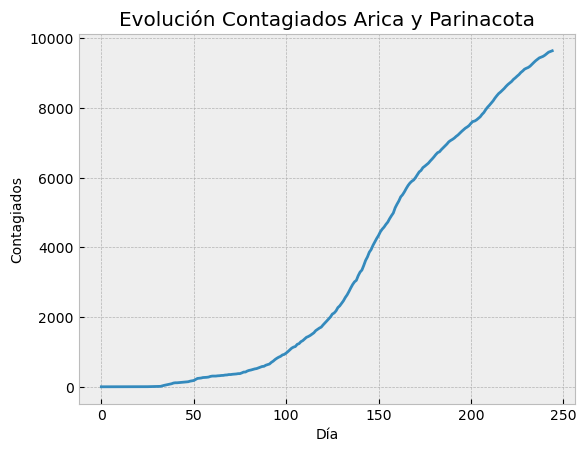

In [45]:
plt.plot(dfap)
plt.title('Evolución Contagiados Arica y Parinacota')
plt.xlabel('Día')
plt.ylabel('Contagiados')

Text(0.5, 1.0, 'Evolución Contagiados Arica y Parinacota')

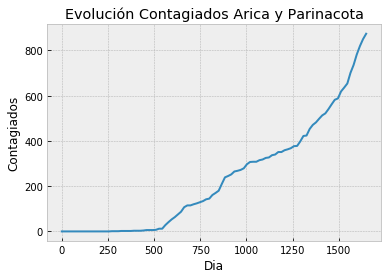

### Haga un gráfico que contenga las curvas de todas las regiones excepto la región metropolitana

#### Armando tabla para cada región:

In [84]:
def regionn(region):
    dfap=df[df['Region']==region]
    dfap = dfap.groupby('Fecha').sum()
    dfap.reset_index(inplace=True)
    dfap.drop('Fecha',axis=1, inplace=True)
    return dfap


#'Arica y Parinacota', 'Tarapacá', 'Antofagasta', 'Atacama',
  #     'Coquimbo', 'Valparaíso', 'Metropolitana', 'O’Higgins', 'Maule',
  #     'Ñuble', 'Biobío', 'Araucanía', 'Los Ríos', 'Los Lagos', 'Aysén',
  #     'Magallanes'
d1=regionn('Arica y Parinacota')
d2=regionn('Tarapacá')
d3=regionn('Antofagasta')
d4=regionn('Atacama')
d5=regionn('Coquimbo')
d6=regionn('Valparaíso')
d7=regionn('O’Higgins')
d8=regionn('Maule')
d9=regionn('Ñuble')
d10=regionn('Biobío')
d11=regionn('Araucanía')
d12=regionn('Los Ríos')
d13=regionn('Los Lagos')
d14=regionn('Aysén')
d15=regionn('Magallanes')
d16=regionn('Metropolitana')

C:\Users\Sebastian\AppData\Local\Temp\ipykernel_3156\3952248361.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfap = dfap.groupby('Fecha').sum()
C:\Users\Sebastian\AppData\Local\Temp\ipykernel_3156\3952248361.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfap = dfap.groupby('Fecha').sum()
C:\Users\Sebastian\AppData\Local\Temp\ipykernel_3156\3952248361.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfap =

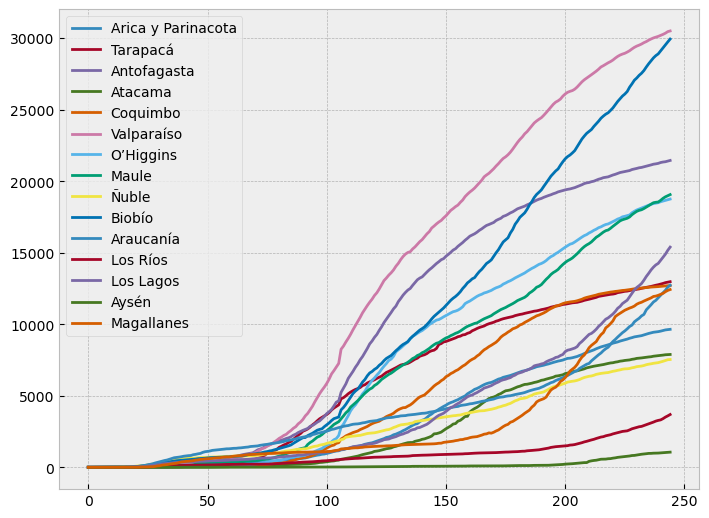

In [67]:

fig = plt.figure()
axes = fig.add_axes([0,0,1,1])


axes.plot(d1, label='Arica y Parinacota')
axes.plot(d2, label='Tarapacá')
axes.plot(d3, label='Antofagasta')
axes.plot(d4, label='Atacama')
axes.plot(d5, label='Coquimbo')
axes.plot(d6, label='Valparaíso')
axes.plot(d7, label='O’Higgins')
axes.plot(d8, label='Maule')
axes.plot(d9, label='Ñuble')
axes.plot(d10, label='Biobío')
axes.plot(d11, label='Araucanía')
axes.plot(d12, label='Los Ríos')
axes.plot(d13, label='Los Lagos')
axes.plot(d14, label='Aysén')
axes.plot(d15, label='Magallanes')


axes.legend(loc=0)

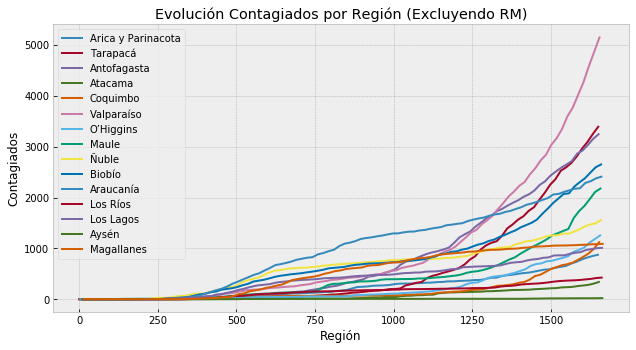

### Haga un gráfico compuesto por sub-gráficos de la evolución de los contagios en cada región

In [102]:
d=['Arica y Parinacota', 'Tarapacá', 'Antofagasta', 'Atacama',
       'Coquimbo', 'Valparaíso', 'Metropolitana', 'O’Higgins', 'Maule',
       'Ñuble', 'Biobío', 'Araucanía', 'Los Ríos', 'Los Lagos', 'Aysén',
       'Magallanes']
e=[d1,d2,d3,d4,d5,d6,d7,d8,d9,d10,d11,d12,d13,d14,d15,d16]


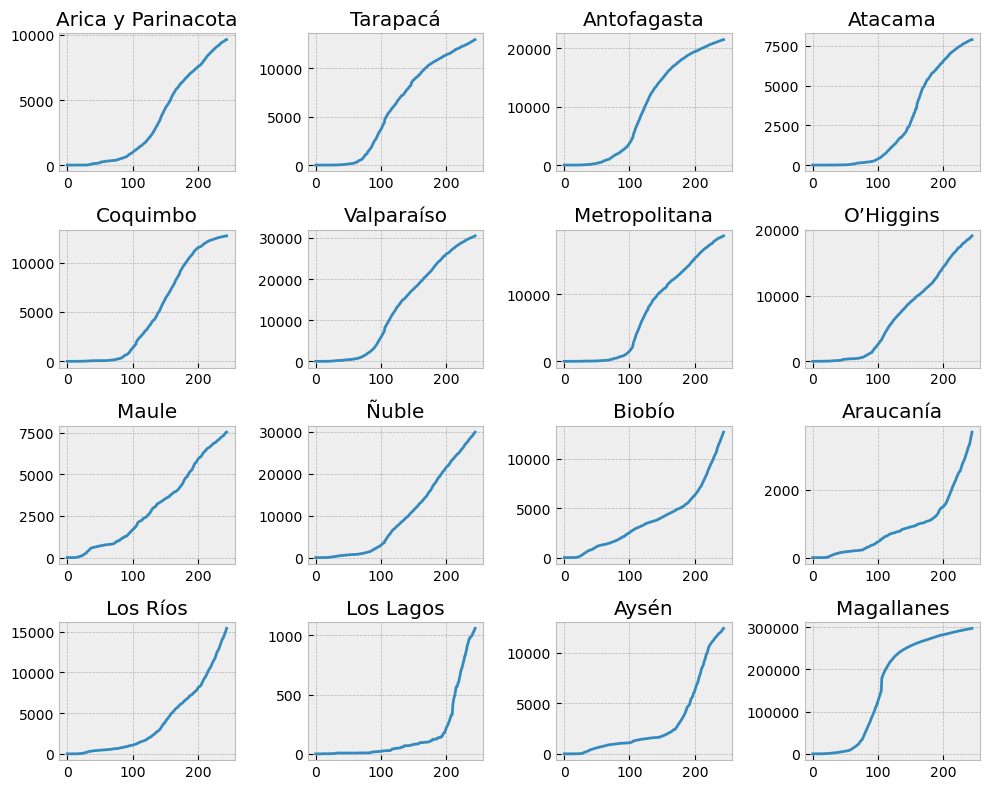

In [109]:

contador=0

               

fig, axes = plt.subplots(nrows=4, ncols=4,figsize=(10,8))
for i in range(0,4):
    for j in range(0,4):
        axes[i][j].set_title(d[contador])
        axes[i][j].plot(e[contador])
        contador=contador+1



fig.tight_layout()

In [87]:
df['Region'].unique()

array(['Arica y Parinacota', 'Tarapacá', 'Antofagasta', 'Atacama',
       'Coquimbo', 'Valparaíso', 'Metropolitana', 'O’Higgins', 'Maule',
       'Ñuble', 'Biobío', 'Araucanía', 'Los Ríos', 'Los Lagos', 'Aysén',
       'Magallanes'], dtype=object)

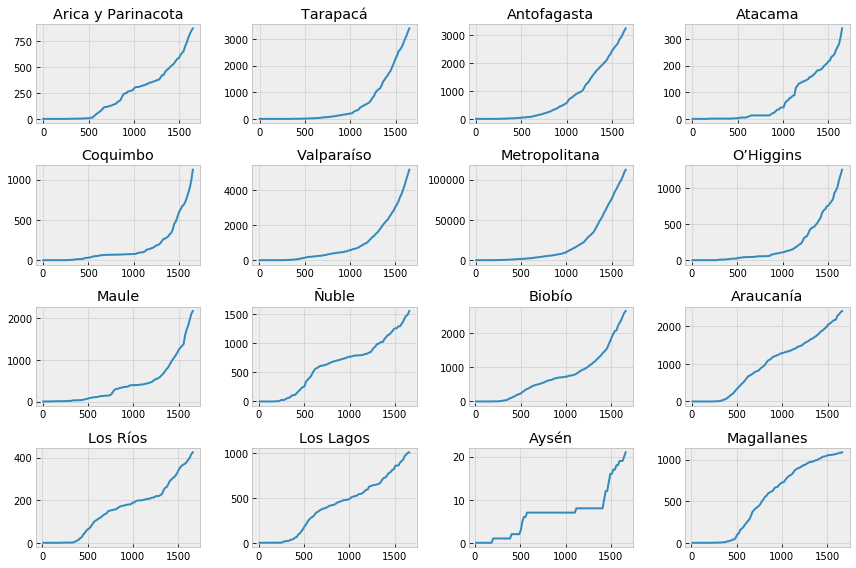

#### Haga un gráfico de torta con los contagios por región utilizando los datos del último día de medición

In [138]:
df3 = df[ df['Fecha']==df['Fecha'].max() ].groupby('Region').sum()
df3

df4=df3.drop(df3.index[11])
df4



C:\Users\Sebastian\AppData\Local\Temp\ipykernel_3156\2647759.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df3 = df[ df['Fecha']==df['Fecha'].max() ].groupby('Region').sum()


,Total
Region,
Antofagasta,21447.0
Araucanía,12726.0
Arica y Parinacota,9644.0
Atacama,7887.0
Aysén,1060.0
Biobío,29931.0
Coquimbo,12698.0
Los Lagos,15391.0
Los Ríos,3690.0


C:\Users\Sebastian\AppData\Local\Temp\ipykernel_3156\3821297096.py:5: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


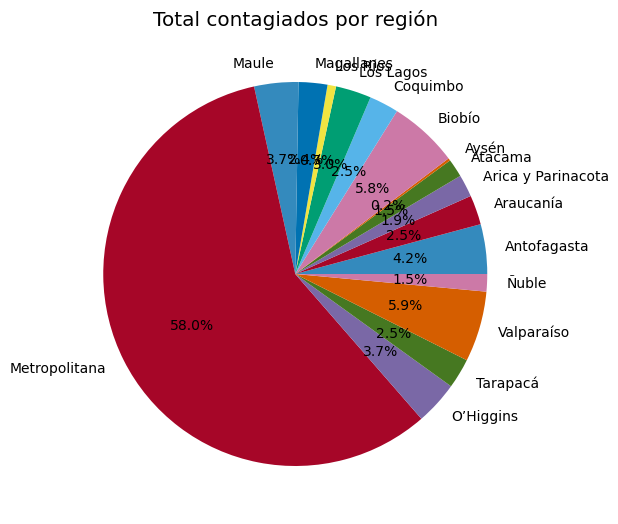

In [115]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.pie(df3['Total'], labels=df3.index, autopct='%1.1f%%' )
axes.set_title('Total contagiados por región')
fig.show()

Text(0.5, 1.0, 'Total Contagiados por Región')

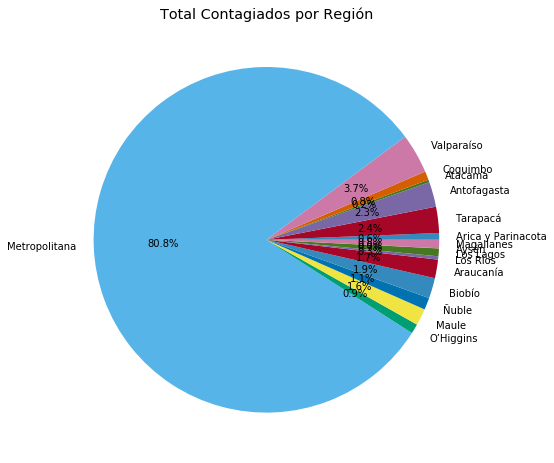

### Haga un gráfico de barras donde muestre todas las regiones excepto la metropolitana y los datos del último día

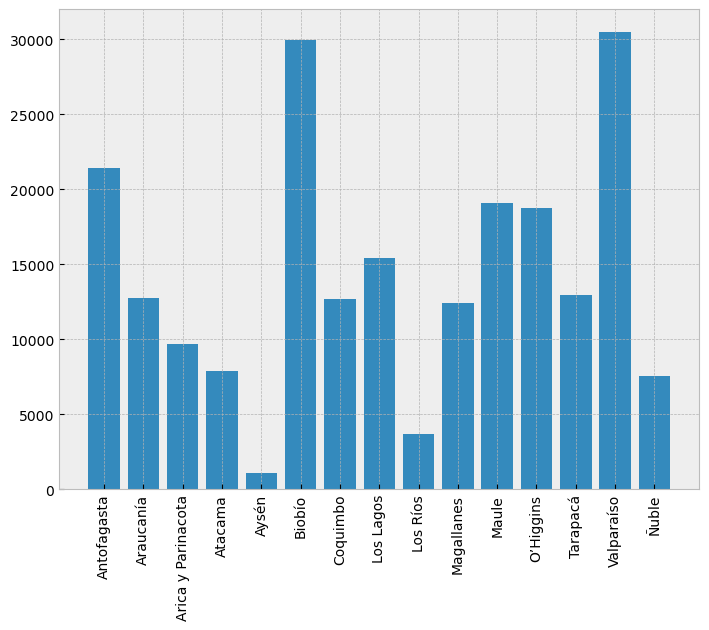

In [139]:
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes.bar(df4.index, df4['Total'])
axes.tick_params(axis='x', labelrotation=90)

Text(0.5, 1.0, 'Total Contagiados por Región')

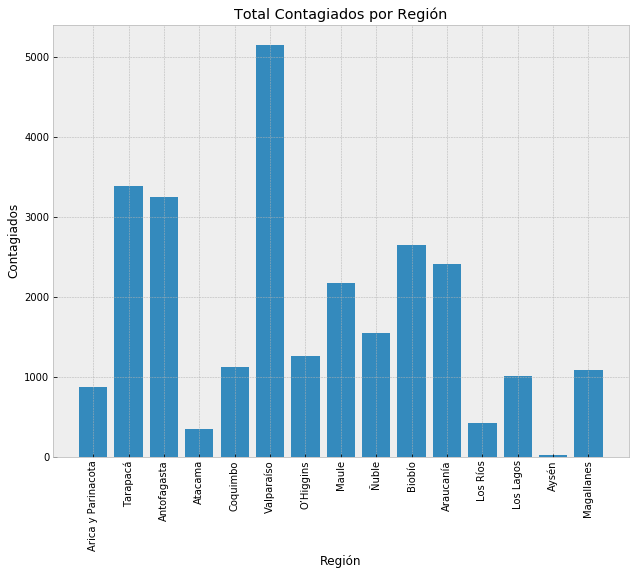

---